In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt
import seaborn as sns
import re

# set the graphs to show in the jupyter notebook
%matplotlib inline

# set seabor graphs to a better style
sns.set(style="ticks")
import os

%cd C:\Users\vikas\OneDrive\Documents\Bussiness Analytics\Python\Assignment\Python Foundation End to End Case Study E-Commerce Analytics Project

C:\Users\vikas\OneDrive\Documents\Bussiness Analytics\Python\Assignment\Python Foundation End to End Case Study E-Commerce Analytics Project


In [38]:
import datetime
from datetime import datetime as dt

In [39]:
customers=pd.read_csv('CUSTOMERS.csv')
geo_location=pd.read_csv('GEO_LOCATION.csv')
order_items=pd.read_csv('ORDER_ITEMS.csv')
order_payments=pd.read_csv('ORDER_PAYMENTS.csv')
order_review_ratings=pd.read_csv('ORDER_REVIEW_RATINGS.csv')
orders=pd.read_csv('ORDERS.csv')
products=pd.read_csv('PRODUCTS.csv')
sellers=pd.read_csv('SELLERS.csv')

In [40]:
order_items.isna().sum()

order_id               0
order_item_id          0
product_id             0
seller_id              0
shipping_limit_date    0
price                  0
freight_value          0
dtype: int64

## CLEANING

In [41]:
def miss_treat(x):
    if x.dtype=='float' or x.dtype=='int':
        x=x.fillna(x.median())
    else:
        x=x.fillna(x.mode()[0])
    return x    

In [42]:
sellers=sellers.apply(miss_treat)

In [43]:
products=products.apply(miss_treat)

In [44]:
orders=orders.apply(miss_treat)

In [45]:
orders.order_purchase_timestamp=orders.order_purchase_timestamp.astype('datetime64')
orders.order_approved_at=orders.order_approved_at.astype('datetime64')
orders.order_delivered_carrier_date=orders.order_delivered_carrier_date.astype('datetime64')
orders.order_delivered_customer_date=orders.order_delivered_customer_date.astype('datetime64')
orders.order_estimated_delivery_date=orders.order_estimated_delivery_date.astype('datetime64')

In [46]:
order_items=order_items.apply(miss_treat)

In [47]:
order_items

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,9/19/2017 9:45,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,5/3/2017 11:05,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,1/18/2018 14:48,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,8/15/2018 10:10,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2/13/2017 13:57,199.90,18.14
...,...,...,...,...,...,...,...
112645,fffc94f6ce00a00581880bf54a75a037,1,4aa6014eceb682077f9dc4bffebc05b0,b8bc237ba3788b23da09c0f1f3a3288c,5/2/2018 4:11,299.99,43.41
112646,fffcd46ef2263f404302a634eb57f7eb,1,32e07fd915822b0765e448c4dd74c828,f3c38ab652836d21de61fb8314b69182,7/20/2018 4:31,350.00,36.53
112647,fffce4705a9662cd70adb13d4a31832d,1,72a30483855e2eafc67aee5dc2560482,c3cfdc648177fdbbbb35635a37472c53,10/30/2017 17:14,99.90,16.95
112648,fffe18544ffabc95dfada21779c9644f,1,9c422a519119dcad7575db5af1ba540e,2b3e4a2a3ea8e01938cabda2a3e5cc79,8/21/2017 0:04,55.99,8.72


In [48]:
order_items.shipping_limit_date=order_items.shipping_limit_date.astype('datetime64')
order_items.order_item_id=order_items.order_item_id.astype('object')

In [49]:
order_review_ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column                   Non-Null Count   Dtype 
---  ------                   --------------   ----- 
 0   review_id                100000 non-null  object
 1   order_id                 100000 non-null  object
 2   review_score             100000 non-null  int64 
 3   review_creation_date     100000 non-null  object
 4   review_answer_timestamp  100000 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


In [50]:
order_review_ratings.review_creation_date=order_review_ratings.review_creation_date.astype('datetime64')
order_review_ratings.review_answer_timestamp=order_review_ratings.review_answer_timestamp.astype('datetime64')

In [51]:
geo_location.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19015 entries, 0 to 19014
Data columns (total 5 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   geolocation_zip_code_prefix  19015 non-null  int64  
 1   geolocation_lat              19015 non-null  float64
 2   geolocation_lng              19015 non-null  float64
 3   geolocation_city             19015 non-null  object 
 4   geolocation_state            19015 non-null  object 
dtypes: float64(2), int64(1), object(2)
memory usage: 742.9+ KB


In [52]:
cust_ord=pd.merge(left=customers,right=orders,on='customer_id',how='left')
cust_rev=pd.merge(left=order_items,right=cust_ord,on='order_id',how='left')
prod_cust=pd.merge(left=cust_rev,right=products,on='product_id',how='left')
cst_ordpy=pd.merge(how='inner',left=cust_ord,right=order_payments,on='order_id')
cust_paym=pd.merge(left=cust_rev,right=order_review_ratings,how='inner',on='order_id')
pro_rev=pd.merge(left=prod_cust,right=order_review_ratings,on='order_id',how='inner')
loc_ratings=pd.merge(left=pro_rev,right=geo_location,right_on='geolocation_zip_code_prefix',left_on='customer_zip_code_prefix',how='inner')
sell_ratings=pd.merge(left=pro_rev,right=sellers,on='seller_id',how='left')
cust_ord_order_item=pd.merge(how='inner',left=cust_ord,right=order_items,on='order_id')

## 1. Perform Detailed exploratory analysis
## a. Define & calculate high level metrics like (Total Revenue, Total quantity, Total products, Total categories, Total sellers, Total locations, Total channels, Total payment methods etc…)

In [53]:
print(f'The Total Revenue : {(cust_rev.price).sum()}')
print(f'The Total quantity: {order_items.order_item_id.count()}')
print(f'The Total product: {products.product_id.count()}')
print(f'The Total categories: {products.product_category_name.nunique()}')
print(f'The Total sellers: {sellers.seller_id.count()}')
print(f'The Total locations: {geo_location.geolocation_zip_code_prefix.nunique()}')
print(f'The Total payment methods: {order_payments.payment_type.nunique()}')

The Total Revenue : 13591643.700000003
The Total quantity: 112650
The Total product: 32951
The Total categories: 71
The Total sellers: 3095
The Total locations: 19015
The Total payment methods: 5


## b. Understanding how many new customers acquired every month

In [54]:
cust_ord['month']=orders.order_purchase_timestamp.dt.to_period('M')

In [55]:
q=pd.crosstab(cust_ord.month,cust_ord.customer_unique_id).sum(axis=1)
y=list(q)
np.sum(y)

99441

In [56]:
cust_each_month=pd.DataFrame(q)

In [57]:
df=cust_ord.groupby(['order_id', 'customer_unique_id']).last().reset_index()

In [58]:
customer_per_month = cust_ord.groupby(['month', cust_ord.customer_unique_id.rename('customer')]).customer_unique_id.count().reset_index()
customer_per_month

,month,customer,customer_unique_id
0,2016-09,208c243a9fe50639cbef36748254ca72,1
1,2016-09,ac162ff796817cd3b69106c684a0e447,1
2,2016-09,be114997aa2e6f93827c7ee261e550c8,1
3,2016-09,d38db8e13c1f15ddbf9fd302a4eaafaa,1
4,2016-10,001a2bf0e46c684031af91fb2bce149d,1
...,...,...,...
99212,2018-09,f60fe3cb5de099b3055c4cefada6c1c7,1
99213,2018-10,202a17812bf14c4879aa314899918c86,1
99214,2018-10,832d9b1424ba5a4e691bdb0bea10ccf8,1
99215,2018-10,bf8195e0faf7723e9c14affbfe36a4ba,1


In [59]:
cust_firstpurchase = df.groupby('customer_unique_id').month.min().reset_index(
).rename(columns={'customer_unique_id': 'customer', 'Month_of_Purchase': 'first_month_of_purchase'})
cust_firstpurchase
final = pd.merge(left=customer_per_month,right=cust_firstpurchase, on='customer')
final

,month_x,customer,customer_unique_id,month_y
0,2016-09,208c243a9fe50639cbef36748254ca72,1,2016-09
1,2016-09,ac162ff796817cd3b69106c684a0e447,1,2016-09
2,2016-09,be114997aa2e6f93827c7ee261e550c8,1,2016-09
3,2016-09,d38db8e13c1f15ddbf9fd302a4eaafaa,1,2016-09
4,2016-10,001a2bf0e46c684031af91fb2bce149d,1,2016-10
...,...,...,...,...
99212,2018-09,d503a54b097839c00b51c1000c863873,1,2018-09
99213,2018-09,f60fe3cb5de099b3055c4cefada6c1c7,1,2018-09
99214,2018-10,202a17812bf14c4879aa314899918c86,1,2018-10
99215,2018-10,832d9b1424ba5a4e691bdb0bea10ccf8,1,2018-10


In [60]:
final.customer_unique_id = np.where(final.month_x == final.month_y, 'New_cust', 'Old_cust')
final

,month_x,customer,customer_unique_id,month_y
0,2016-09,208c243a9fe50639cbef36748254ca72,New_cust,2016-09
1,2016-09,ac162ff796817cd3b69106c684a0e447,New_cust,2016-09
2,2016-09,be114997aa2e6f93827c7ee261e550c8,New_cust,2016-09
3,2016-09,d38db8e13c1f15ddbf9fd302a4eaafaa,New_cust,2016-09
4,2016-10,001a2bf0e46c684031af91fb2bce149d,New_cust,2016-10
...,...,...,...,...
99212,2018-09,d503a54b097839c00b51c1000c863873,New_cust,2018-09
99213,2018-09,f60fe3cb5de099b3055c4cefada6c1c7,New_cust,2018-09
99214,2018-10,202a17812bf14c4879aa314899918c86,New_cust,2018-10
99215,2018-10,832d9b1424ba5a4e691bdb0bea10ccf8,New_cust,2018-10


In [61]:
new = final[final.customer_unique_id == 'New_cust'].groupby(by='month_x').agg('count')['customer_unique_id']
new

month_x
2016-09       4
2016-10     324
2016-12       1
2017-01     799
2017-02    1778
2017-03    2676
2017-04    2386
2017-05    3670
2017-06    3215
2017-07    3975
2017-08    4264
2017-09    4208
2017-10    4534
2017-11    7352
2017-12    5515
2018-01    7016
2018-02    6445
2018-03    6900
2018-04    6623
2018-05    6509
2018-06    5842
2018-07    5923
2018-08    6119
2018-09      15
2018-10       3
Freq: M, Name: customer_unique_id, dtype: int64

## c. Understand the retention of customers on month on month basis

In [62]:
retention = final[final.month_x!=final.month_y]   
retention.groupby('month_x')[['customer_unique_id']].count()

,customer_unique_id
month_x,
2017-03,4
2017-04,14
2017-05,21
2017-06,28
2017-07,44
2017-08,60
2017-09,70
2017-10,90
2017-11,165


## d. How the revenues from existing/new customers on month on month basis

In [69]:
order_items['Revenue']=order_items['price']

In [80]:
order_items

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,Revenue
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:00,58.90,13.29,58.90
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:00,239.90,19.93,239.90
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:00,199.00,17.87,199.00
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:00,12.99,12.79,12.99
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:00,199.90,18.14,199.90
...,...,...,...,...,...,...,...,...
112645,fffc94f6ce00a00581880bf54a75a037,1,4aa6014eceb682077f9dc4bffebc05b0,b8bc237ba3788b23da09c0f1f3a3288c,2018-05-02 04:11:00,299.99,43.41,299.99
112646,fffcd46ef2263f404302a634eb57f7eb,1,32e07fd915822b0765e448c4dd74c828,f3c38ab652836d21de61fb8314b69182,2018-07-20 04:31:00,350.00,36.53,350.00
112647,fffce4705a9662cd70adb13d4a31832d,1,72a30483855e2eafc67aee5dc2560482,c3cfdc648177fdbbbb35635a37472c53,2017-10-30 17:14:00,99.90,16.95,99.90
112648,fffe18544ffabc95dfada21779c9644f,1,9c422a519119dcad7575db5af1ba540e,2b3e4a2a3ea8e01938cabda2a3e5cc79,2017-08-21 00:04:00,55.99,8.72,55.99


In [83]:
cust_ord_order_item=pd.merge(how='inner',left=cust_ord,right=order_items,on='order_id')
cust_ord_order_item

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,month,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,Revenue
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,Adilabad,Andhra Pradesh,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:00,2017-05-16 15:22:00,2017-05-23 10:47:00,2017-05-25 10:35:00,2017-06-05,2017-10,1,a9516a079e37a9c9c36b9b78b10169e8,7c67e1448b00f6e969d365cea6b010ab,2017-05-22 15:22:00,124.99,21.88,124.99
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,Adoni,Andhra Pradesh,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:00,2018-01-12 20:58:00,2018-01-15 17:14:00,2018-01-29 12:41:00,2018-02-06,2018-07,1,4aa6014eceb682077f9dc4bffebc05b0,b8bc237ba3788b23da09c0f1f3a3288c,2018-01-18 20:58:00,289.00,46.48,289.00
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,Akkarampalle,Andhra Pradesh,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:00,2018-05-20 16:19:00,2018-06-11 14:31:00,2018-06-14 17:58:00,2018-06-13,2018-08,1,bd07b66896d6f1494f5b86251848ced7,7c67e1448b00f6e969d365cea6b010ab,2018-06-05 16:19:00,139.94,17.79,139.94
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,Akkayapalle,Andhra Pradesh,951670f92359f4fe4a63112aa7306eba,delivered,2018-03-13 16:06:00,2018-03-13 17:29:00,2018-03-27 23:22:00,2018-03-28 16:04:00,2018-04-10,2017-11,1,a5647c44af977b148e0a3a4751a09e2e,7c67e1448b00f6e969d365cea6b010ab,2018-03-27 16:31:00,149.94,23.36,149.94
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,Alwal,Andhra Pradesh,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-07-29 09:51:00,2018-07-29 10:10:00,2018-07-30 15:16:00,2018-08-09 20:55:00,2018-08-15,2018-02,1,9391a573abe00141c56e38d84d7d5b3b,4a3ca9315b744ce9f8e9374361493884,2018-07-31 10:10:00,230.00,22.25,230.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112645,17ddf5dd5d51696bb3d7c6291687be6f,1a29b476fee25c95fbafc67c5ac95cf8,3937,Akkarampalle,Andhra Pradesh,6760e20addcf0121e9d58f2f1ff14298,delivered,2018-04-07 15:48:00,2018-04-07 16:08:00,2018-04-11 02:08:00,2018-04-13 20:06:00,2018-04-25,2017-03,1,ccb4503d9d43d245d3b295d0544f988b,527801b552d0077ffd170872eb49683b,2018-04-12 16:08:00,74.90,13.88,74.90
112646,e7b71a9017aa05c9a7fd292d714858e8,d52a67c98be1cf6a5c84435bd38d095d,6764,Nizamabad,Andhra Pradesh,9ec0c8947d973db4f4e8dcf1fbfa8f1b,delivered,2018-04-04 08:20:00,2018-04-04 08:35:00,2018-04-05 18:42:00,2018-04-11 18:54:00,2018-04-20,2018-02,1,9ede6b0570a75a4b9de4f383329f99ee,3fd1e727ba94cfe122d165e176ce7967,2018-04-10 08:35:00,114.90,14.16,114.90
112647,5e28dfe12db7fb50a4b2f691faecea5e,e9f50caf99f032f0bf3c55141f019d99,60115,Dowleswaram,Andhra Pradesh,fed4434add09a6f332ea398efd656a5c,delivered,2018-04-08 20:11:00,2018-04-08 20:30:00,2018-04-09 17:52:00,2018-05-09 19:03:00,2018-05-02,2017-08,1,7a5d2e1e131a860ae7d18f6fffa9d689,d9e7e7778b32987280a6f2cb9a39c57d,2018-04-12 20:30:00,37.00,19.04,37.00
112648,56b18e2166679b8a959d72dd06da27f9,73c2643a0a458b49f58cea58833b192e,92120,Vepagunta,Andhra Pradesh,e31ec91cea1ecf97797787471f98a8c2,delivered,2017-11-03 21:08:00,2017-11-03 21:31:00,2017-11-06 18:24:00,2017-11-16 19:58:00,2017-12-05,2018-01,1,f819f0c84a64f02d3a5606ca95edd272,4869f7a5dfa277a7dca6462dcf3b52b2,2017-11-09 21:15:00,689.00,22.07,689.00


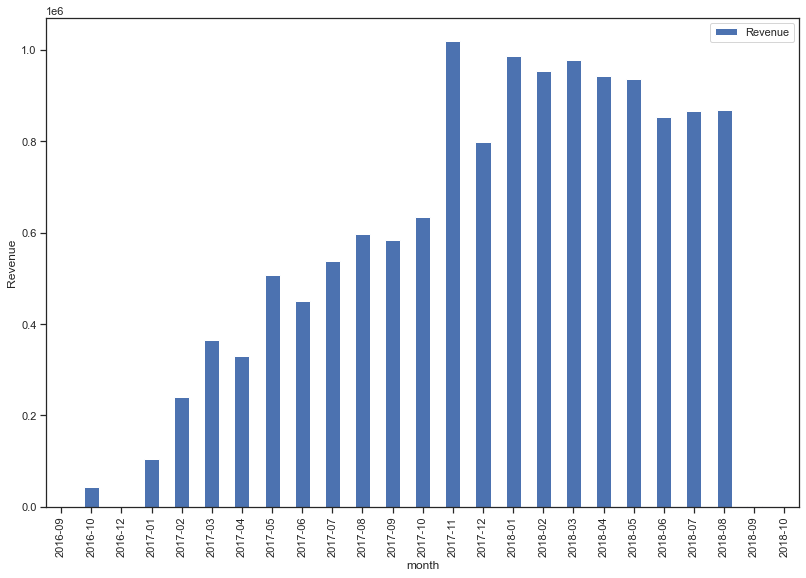

In [97]:
customers['month']=orders.order_purchase_timestamp.dt.to_period('M')
pd.pivot_table(data=cust_ord_order_item,values='Revenue',index='month',aggfunc='sum').plot(kind='bar',figsize=(13.5,9),ylabel='Revenue')
plt.show()

## e. Understand the trends/seasonality of sales, quantity by category, location, month,week, day, time, channel, payment method etc…

In [105]:
cust_ord_order_item_prod=pd.merge(how='left',left=cust_ord_order_item,right=products,on='product_id')

In [106]:
cust_ord_order_item_prod

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,...,freight_value,Revenue,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,Adilabad,Andhra Pradesh,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:00,2017-05-16 15:22:00,2017-05-23 10:47:00,...,21.88,124.99,Office_Furniture,41.0,1141.0,1.0,8683.0,54.0,64.0,31.0
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,Adoni,Andhra Pradesh,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:00,2018-01-12 20:58:00,2018-01-15 17:14:00,...,46.48,289.00,Housewares,43.0,1002.0,3.0,10150.0,89.0,15.0,40.0
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,Akkarampalle,Andhra Pradesh,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:00,2018-05-20 16:19:00,2018-06-11 14:31:00,...,17.79,139.94,Office_Furniture,55.0,955.0,1.0,8267.0,52.0,52.0,17.0
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,Akkayapalle,Andhra Pradesh,951670f92359f4fe4a63112aa7306eba,delivered,2018-03-13 16:06:00,2018-03-13 17:29:00,2018-03-27 23:22:00,...,23.36,149.94,Office_Furniture,48.0,1066.0,1.0,12160.0,56.0,51.0,28.0
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,Alwal,Andhra Pradesh,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-07-29 09:51:00,2018-07-29 10:10:00,2018-07-30 15:16:00,...,22.25,230.00,Home_Confort,61.0,407.0,1.0,5200.0,45.0,15.0,35.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112645,17ddf5dd5d51696bb3d7c6291687be6f,1a29b476fee25c95fbafc67c5ac95cf8,3937,Akkarampalle,Andhra Pradesh,6760e20addcf0121e9d58f2f1ff14298,delivered,2018-04-07 15:48:00,2018-04-07 16:08:00,2018-04-11 02:08:00,...,13.88,74.90,Books_General_Interest,51.0,489.0,2.0,611.0,22.0,22.0,23.0
112646,e7b71a9017aa05c9a7fd292d714858e8,d52a67c98be1cf6a5c84435bd38d095d,6764,Nizamabad,Andhra Pradesh,9ec0c8947d973db4f4e8dcf1fbfa8f1b,delivered,2018-04-04 08:20:00,2018-04-04 08:35:00,2018-04-05 18:42:00,...,14.16,114.90,Sports_Leisure,51.0,1193.0,1.0,1211.0,25.0,24.0,22.0
112647,5e28dfe12db7fb50a4b2f691faecea5e,e9f50caf99f032f0bf3c55141f019d99,60115,Dowleswaram,Andhra Pradesh,fed4434add09a6f332ea398efd656a5c,delivered,2018-04-08 20:11:00,2018-04-08 20:30:00,2018-04-09 17:52:00,...,19.04,37.00,Health_Beauty,60.0,575.0,1.0,870.0,25.0,20.0,18.0
112648,56b18e2166679b8a959d72dd06da27f9,73c2643a0a458b49f58cea58833b192e,92120,Vepagunta,Andhra Pradesh,e31ec91cea1ecf97797787471f98a8c2,delivered,2017-11-03 21:08:00,2017-11-03 21:31:00,2017-11-06 18:24:00,...,22.07,689.00,Watches_Gifts,59.0,452.0,1.0,710.0,19.0,13.0,14.0


In [107]:
##sales_category
pd.pivot_table(data=cust_ord_order_item_prod,values='Revenue',index='product_category_name',aggfunc='sum')

,Revenue
product_category_name,
Agro_Industry_And_Commerce,72530.47
Air_Conditioning,55024.96
Art,24202.64
Arts_And_Craftmanship,1814.01
Audio,50688.50
...,...
Stationery,230943.23
Tablets_Printing_Image,7528.41
Telephony,323667.53


In [108]:
##quantity_by_category
pd.pivot_table(data=cust_ord_order_item_prod,index='product_category_name',values='order_id',aggfunc='count')

,order_id
product_category_name,
Agro_Industry_And_Commerce,212
Air_Conditioning,297
Art,209
Arts_And_Craftmanship,24
Audio,364
...,...
Stationery,2517
Tablets_Printing_Image,83
Telephony,4545


In [109]:
##sales_by_months
pd.pivot_table(data=cust_ord_order_item_prod,values='Revenue',index='month',aggfunc='sum')

,Revenue
month,
2016-09,281.59
2016-10,43289.87
2016-12,109.90
2017-01,104755.45
2017-02,239569.20
2017-03,365202.73
2017-04,329290.30
2017-05,506776.40
2017-06,449215.35


In [110]:
##quantity_by_month
pd.pivot_table(data=cust_ord_order_item_prod,values='order_id',index='month',aggfunc='count')

,order_id
month,
2016-09,5
2016-10,398
2016-12,1
2017-01,926
2017-02,2029
2017-03,3030
2017-04,2716
2017-05,4190
2017-06,3681


In [111]:
##quantity_by_days
customers['day']=orders.order_purchase_timestamp.dt.to_period('D')
cust_ord=pd.merge(how='left',left=customers,right=orders,on='customer_id')
pd.pivot_table(data=cust_ord,index='day',values='order_id',aggfunc='count')

,order_id
day,
2016-09-04,1
2016-09-05,1
2016-09-13,1
2016-09-15,1
2016-10-02,1
...,...
2018-09-29,1
2018-10-01,1
2018-10-03,1


In [112]:
##sales_by_days
customers['day']=orders.order_purchase_timestamp.dt.to_period('D')
cust_ord_order_item=pd.merge(how='inner',left=cust_ord,right=order_items,on='order_id')
pd.pivot_table(data=cust_ord_order_item,index='day',values='Revenue',aggfunc='sum')

,Revenue
day,
2016-09-04,19.99
2016-09-05,123.80
2016-09-13,47.90
2016-09-15,89.90
2016-10-02,23.50
...,...
2018-09-29,115.20
2018-10-01,39.99
2018-10-03,157.77


In [138]:
##quantity_by_city
pd.pivot_table(data=loc_ratings,index='customer_city',values='order_id',aggfunc='count')

,order_id
customer_city,
Aadityana,19
Aambaliyasan,2
Aantaliya,100
Aarambhada,51
Abiramam,1
...,...
Zamin Uthukuli,2
Ziauddin Pur,160
Zira,4


In [114]:
##sales_by_location
cust_ord_order_item_geoloc=pd.merge(how='inner',left=loc_ratings,right=order_items,on='order_id')
pd.pivot_table(data=cust_ord_order_item_geoloc,index='customer_city',values='Revenue',aggfunc='sum')

,Revenue
customer_city,
Aadityana,1748.52
Aambaliyasan,169.80
Aantaliya,14154.47
Aarambhada,6015.34
Abiramam,74.90
...,...
Zamin Uthukuli,107.99
Ziauddin Pur,21431.10
Zira,434.65


In [136]:
##quantity_by_payment_type
pd.pivot_table(data=cst_ordpy,index='payment_type',values='order_id',aggfunc='count')

,order_id
payment_type,
UPI,19784
credit_card,76795
debit_card,1529
not_defined,3
voucher,5775


In [118]:
##sales_by_payment
cst_ordpy_orditem=pd.merge(how='inner',left=cust_ord_order_item,right=order_payments,on='order_id')
pd.pivot_table(data=cst_ordpy_orditem,index='payment_type',values='Revenue',aggfunc='sum')

,Revenue
payment_type,
UPI,2391525.66
credit_card,10974357.30
debit_card,183758.74
voucher,659473.64


## f. Popular Products by month, seller, state, category.

In [123]:
cust_ord_order_item_prod.groupby(['month',cust_ord_order_item_prod.product_id.rename('product')]
                                ).product_id.count().reset_index().sort_values(by=['month','product_id'],ascending=[True,False])

,month,product,product_id
3,2016-09,e5ae72c62ebfa708624f5029d609b160,2
0,2016-09,154e7e31ebfa092203795c972e5804a6,1
1,2016-09,57e089e3103f5cda6a4ce23b77399bdb,1
2,2016-09,a3126b78e50cb94ff1a2826837bc6877,1
215,2016-10,a62e25e09e05e6faf31d90c6ec1aa3d1,13
...,...,...,...
74944,2018-09,fb29f48bfea41db52e349454f433340e,1
74945,2018-10,06edb72f1e0c64b14c5b79353f7abea3,1
74946,2018-10,1613b819ab5dae53aead2dbb4ebdb378,1
74947,2018-10,36f60d45225e60c7da4558b070ce4b60,1


In [124]:
cust_ord_order_item_prod.groupby(['seller_id',cust_ord_order_item_prod.product_id.rename('product')]
                             ).product_id.count().reset_index().sort_values(by=['seller_id','product_id'],ascending=[True,False])

,seller_id,product,product_id
0,0015a82c2db000af6aaaf3ae2ecb0532,a2ff5a97bf95719e38ea2e3b4105bce8,3
1,001cca7ae9ae17fb1caed9dfb1094831,08574b074924071f4e201e151b152b4e,113
11,001cca7ae9ae17fb1caed9dfb1094831,e251ebd2858be1aa7d9b2087a6992580,48
9,001cca7ae9ae17fb1caed9dfb1094831,98a8c2fa16d7239c606640f5555768e4,30
2,001cca7ae9ae17fb1caed9dfb1094831,0da9ffd92214425d880de3f94e74ce39,17
...,...,...,...
34442,ffff564a4f9085cd26170f4732393726,c7d75b3bafed2b1d9475c4876b1c46b8,1
34443,ffff564a4f9085cd26170f4732393726,cb17b798ba889575385281b7ec2fc22b,1
34445,ffff564a4f9085cd26170f4732393726,de6517dda8e49774f58c07f80abc8d7a,1
34446,ffff564a4f9085cd26170f4732393726,e20b58fe57d487f33247e6cc1154eb9c,1


In [125]:
cust_ord_order_item_prod.groupby(['customer_state',cust_ord_order_item_prod.product_id.rename('product')]
                             ).product_id.count().reset_index().sort_values(by=['customer_state','product_id'],ascending=[True,False])

,customer_state,product,product_id
16353,Andhra Pradesh,aca2eb7d00ea1a7b8ebd4e68314663af,345
14598,Andhra Pradesh,99a4788cb24856965c36a24e339b6058,294
6379,Andhra Pradesh,422879e10f46682990de24d770e7f83d,283
8042,Andhra Pradesh,53b36df67ebb7c41585e8d54d6772e08,225
5444,Andhra Pradesh,389d119b48cf3043d311335e499d9c6b,224
...,...,...,...
55199,West Bengal,fa00124915804f23967ae06d7dfd5874,1
55200,West Bengal,fbce4c4cb307679d89a3bf3d3bb353b9,1
55201,West Bengal,fe05ad488982d6de6373f13486d92d99,1
55202,West Bengal,fe6a9515d655fa7936b8a7c841039f34,1


In [126]:
cust_ord_order_item_prod.groupby(['product_category_name',cust_ord_order_item_prod.product_id.rename('product')]
                             ).product_id.count().reset_index().sort_values(by=['product_category_name','product_id'],ascending=[True,False])

,product_category_name,product,product_id
7,Agro_Industry_And_Commerce,11250b0d4b709fee92441c5f34122aed,22
24,Agro_Industry_And_Commerce,423a6644f0aa529e8828ff1f91003690,18
35,Agro_Industry_And_Commerce,672e757f331900b9deea127a2a7b79fd,17
22,Agro_Industry_And_Commerce,3bebad3cf2c8d1a8d3ce97174643e054,14
40,Agro_Industry_And_Commerce,a0fe1efb855f3e786f0650268cd77f44,13
...,...,...,...
32943,Watches_Gifts,feeed1b9f26cce6eb3cb81af65eddd9e,1
32944,Watches_Gifts,fef80a5fb121b63bedd4096ff28f6aaa,1
32947,Watches_Gifts,ff7b4560eaf93a8848cd5fde641f39c6,1
32948,Watches_Gifts,ff80f0538290775336ee74b4997a855c,1


## g. Popular categories by state, month

In [128]:
cust_ord_order_item_prod.groupby(['customer_state',cust_ord_order_item_prod.product_category_name.rename('category')]
                             ).product_category_name.count().reset_index().sort_values(by=['customer_state','product_category_name'],ascending=[True,False])

,customer_state,category,product_category_name
7,Andhra Pradesh,Bed_Bath_Table,8172
43,Andhra Pradesh,Health_Beauty,6023
65,Andhra Pradesh,Sports_Leisure,5327
39,Andhra Pradesh,Furniture_Decor,5239
15,Andhra Pradesh,Computers_Accessories,4859
...,...,...,...
1045,West Bengal,Construction_Tools_Safety,1
1047,West Bengal,Costruction_Tools_Garden,1
1050,West Bengal,Fashion_Male_Clothing,1
1059,West Bengal,Home_Confort,1


In [134]:
cust_ord_order_item_prod.groupby(['month',cust_ord_order_item_prod.product_category_name.rename('category')]
                             ).product_category_name.count().reset_index().sort_values(by=['month','product_category_name'],ascending=[True,False])


,month,category,product_category_name
1,2016-09,Computers_Accessories,2
0,2016-09,Baby,1
2,2016-09,Furniture_Decor,1
3,2016-09,Health_Beauty,1
8,2016-10,Bed_Bath_Table,39
...,...,...,...
1349,2018-09,Telephony,1
1351,2018-09,Watches_Gifts,1
1353,2018-10,Bed_Bath_Table,2
1352,2018-10,Auto,1


## h. List top 10 most expensive products sorted by price

In [132]:
cust_ord_order_item_prod[['product_id','price']].sort_values(by='price',ascending=False)

,product_id,price
15307,489ae2aa008f021502940f251d4cce7f,6735.00
24051,69c590f7ffc7bf8db97190b6cb6ed62e,6729.00
4429,1bdf5e6731585cf01aa8169c7028d6ad,6499.00
30924,a6492cc69376c469ab6f61d8f44de961,4799.00
13683,c3ed642d592594bb648ff4a04cee2747,4690.00
...,...,...
53410,270516a3f41dc035aa87d220228f844c,1.20
53411,270516a3f41dc035aa87d220228f844c,1.20
3578,8a3254bee785a526d548a81a9bc3c9be,0.85
31456,8a3254bee785a526d548a81a9bc3c9be,0.85


## 2. Performing Customers/sellers Segmentation

### a. Divide the customers into groups based on the revenue generated

In [139]:

cust_ord_order_item_prod.Revenue.max()

6735.0

In [140]:
cust_order=pd.merge(how='left',left=customers,right=orders,on='customer_id')
cust_ord_item=pd.merge(how='left',left=cust_order,right=order_items,on='order_id')
new=cust_ord_item[['customer_id','Revenue']]
new['groups']=np.where(new.Revenue>4000,'High',(np.where(new.Revenue>1000,'Medium',(np.where(new.Revenue>900,'Low',('Very Low'))))))
new.head()

C:\Users\vikas\AppData\Local\Temp\ipykernel_9744\3146751526.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new['groups']=np.where(new.Revenue>4000,'High',(np.where(new.Revenue>1000,'Medium',(np.where(new.Revenue>900,'Low',('Very Low'))))))


,customer_id,Revenue,groups
0,06b8999e2fba1a1fbc88172c00ba8bc7,124.99,Very Low
1,18955e83d337fd6b2def6b18a428ac77,289.00,Very Low
2,4e7b3e00288586ebd08712fdd0374a03,139.94,Very Low
3,b2b6027bc5c5109e529d4dc6358b12c3,149.94,Very Low
4,4f2d8ab171c80ec8364f7c12e35b23ad,230.00,Very Low


## b. Divide the sellers into groups based on the revenue generated

In [141]:
seller_orderitem=pd.merge(how='left',left=sellers,right=order_items,on='seller_id')
new1=cust_ord_item[['seller_id','Revenue']]
new1['groups']=np.where(new.Revenue>4000,'High',(np.where(new.Revenue>1000,'Medium',(np.where(new.Revenue>900,'Low',('Very Low'))))))
new1.head()

C:\Users\vikas\AppData\Local\Temp\ipykernel_9744\3074072108.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new1['groups']=np.where(new.Revenue>4000,'High',(np.where(new.Revenue>1000,'Medium',(np.where(new.Revenue>900,'Low',('Very Low'))))))


,seller_id,Revenue,groups
0,7c67e1448b00f6e969d365cea6b010ab,124.99,Very Low
1,b8bc237ba3788b23da09c0f1f3a3288c,289.00,Very Low
2,7c67e1448b00f6e969d365cea6b010ab,139.94,Very Low
3,7c67e1448b00f6e969d365cea6b010ab,149.94,Very Low
4,4a3ca9315b744ce9f8e9374361493884,230.00,Very Low


## 3. Cross-Selling (Which products are selling together)

In [150]:
selling_togthr=order_items[order_items.order_id.duplicated(keep=False)]
st1=selling_togthr[['order_id','product_id']]
st1['buying_together']=st1.groupby(by='order_id')[['product_id']].transform(lambda x:','.join(x))
st1[['order_id','buying_together']].head(10)

C:\Users\vikas\AppData\Local\Temp\ipykernel_9744\391455120.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  st1['buying_together']=st1.groupby(by='order_id')[['product_id']].transform(lambda x:','.join(x))


,order_id,buying_together
13,0008288aa423d2a3f00fcb17cd7d8719,"368c6c730842d78016ad823897a372db,368c6c730842d..."
14,0008288aa423d2a3f00fcb17cd7d8719,"368c6c730842d78016ad823897a372db,368c6c730842d..."
32,00143d0f86d6fbd9f9b38ab440ac16f5,"e95ee6822b66ac6058e2e4aff656071a,e95ee6822b66a..."
33,00143d0f86d6fbd9f9b38ab440ac16f5,"e95ee6822b66ac6058e2e4aff656071a,e95ee6822b66a..."
34,00143d0f86d6fbd9f9b38ab440ac16f5,"e95ee6822b66ac6058e2e4aff656071a,e95ee6822b66a..."
42,001ab0a7578dd66cd4b0a71f5b6e1e41,"0b0172eb0fd18479d29c3bc122c058c2,0b0172eb0fd18..."
43,001ab0a7578dd66cd4b0a71f5b6e1e41,"0b0172eb0fd18479d29c3bc122c058c2,0b0172eb0fd18..."
44,001ab0a7578dd66cd4b0a71f5b6e1e41,"0b0172eb0fd18479d29c3bc122c058c2,0b0172eb0fd18..."
48,001d8f0e34a38c37f7dba2a37d4eba8b,"e67307ff0f15ade43fcb6e670be7a74c,e67307ff0f15a..."
49,001d8f0e34a38c37f7dba2a37d4eba8b,"e67307ff0f15ade43fcb6e670be7a74c,e67307ff0f15a..."


## 4 Payment Behaviour
## a. How customers are paying?

In [151]:
cust_pay=pd.merge(how='inner',left=cust_ord,right=order_payments,on='order_id')
cust_pay.payment_type.unique()

array(['credit_card', 'debit_card', 'voucher', 'UPI', 'not_defined'],
      dtype=object)

## b. Which payment channels are used by most customers?

In [153]:
pd.pivot_table(data=cust_pay,index='payment_type',values='customer_id',aggfunc='count'
              ).sort_values(by='customer_id',ascending=False)

,customer_id
payment_type,
credit_card,76795
UPI,19784
voucher,5775
debit_card,1529
not_defined,3


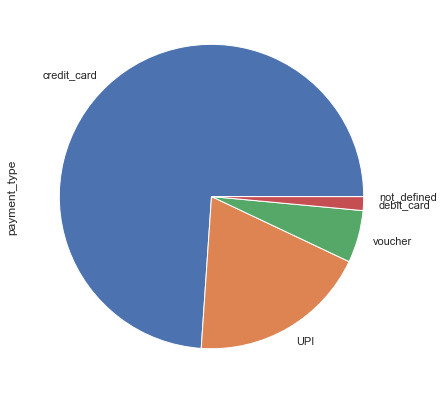

In [160]:
cust_pay.payment_type.value_counts().plot(kind="pie",figsize =(10, 7))
plt.show()

## 5. Customer satisfaction towards category & product
## a. Which categories (top 10) are maximum rated & minimum rated?

In [162]:
prod_order_items=pd.merge(how='left',left=products,right=order_items,on='product_id')
prod_order_items_rate=pd.merge(how='left',left=prod_order_items,right=order_review_ratings,on='order_id')

In [165]:
max_rated=pd.pivot_table(data=prod_order_items_rate,values='review_score',index='product_category_name',aggfunc='mean'
                        ).sort_values(by='review_score',ascending=False).head(10)
max_rated

,review_score
product_category_name,
Cds_Dvds_Musicals,4.642857
Fashion_Childrens_Clothes,4.500000
Books_General_Interest,4.439421
Books_Imported,4.400000
Costruction_Tools_Tools,4.359223
Books_Technical,4.338290
Luggage_Accessories,4.309524
Food_Drink,4.303571
Small_Appliances_Home_Oven_And_Coffee,4.302632


In [166]:
min_rated=pd.pivot_table(data=prod_order_items_rate,values='review_score',index='product_category_name',aggfunc='mean'
                        ).sort_values(by='review_score',ascending=False).tail(10)
min_rated

,review_score
product_category_name,
Audio,3.808219
La_Cuisine,3.785714
Fashio_Female_Clothing,3.780000
Party_Supplies,3.767442
Fixed_Telephony,3.671698
Fashion_Male_Clothing,3.621212
Office_Furniture,3.484421
Home_Comfort_2,3.366667
Diapers_And_Hygiene,3.256410


## b. Which products (top10) are maximum rated & minimum rated?

In [168]:
max_prod=pd.pivot_table(data=prod_order_items_rate,values='review_score',index='product_id',aggfunc='mean'
                       ).sort_values(by='review_score',ascending=False).head(10)
max_prod

,review_score
product_id,
00066f42aeeb9f3007548bb9d3f33c38,5.0
86743ff92eee3d16b7df59cddd583b8c,5.0
868ceb027ab706a4dee42e2220006b85,5.0
868969d3a93aeeab7bfcd4fc3d3d65de,5.0
868766ed2172644fdd977d6bd395a107,5.0
8684bd8f93b4f4038d07188a23811e93,5.0
867c96d2bb67aba6500a4c509cf76072,5.0
867b820367ec206b38a357f2c12454b7,5.0
867901d7e8488fb97f1fb538c09d476e,5.0


In [169]:
min_prod=pd.pivot_table(data=prod_order_items_rate,values='review_score',index='product_id',aggfunc='mean'
                       ).sort_values(by='review_score',ascending=False).tail(10)
min_prod

,review_score
product_id,
ef4f75a1e1266944f1733179e963d4be,1.0
defce8530200d29d2c50f4ca66400e06,1.0
5bc5205ae68bc0e9997e05fa59b06194,1.0
330a8a8d810e84c45bf6fece44e082c8,1.0
84a517a0e06ef2a45abff3cab3f0ad0e,1.0
6b3e612bee768d758d981f0d7992e07e,1.0
1890c01a38d17958d79fe473d451dc9c,1.0
94982c575245c1664b51851ec653a79e,1.0
b5c114b11d53b6fd85a6a90790f0b479,1.0


## c. Average rating by location, seller, product, category, month etc.

In [ ]:
cust_loc=pd.merge(how='left',left=geo_loc,right=cust,left_on='geolocation_zip_code_prefix',right_on='customer_zip_code_prefix')
cust_loc_order=pd.merge(how='left',left=cust_loc,right=order,left_on='customer_id',right_on='customer_id')
final=pd.merge(how='left',left=cust_loc_order,right=ord_rev_rat,left_on='order_id',right_on='order_id')

avg_by_loc=pd.pivot_table(data=final,values='review_score',index='geolocation_state',aggfunc='mean')
avg_by_loc

In [172]:
cust_loc=pd.merge(how='left',left=geo_location,right=customers,
                  left_on='geolocation_zip_code_prefix',right_on='customer_zip_code_prefix')
cust_loc_orders=pd.merge(how='left',left=cust_loc,right=orders,
                         left_on='customer_id',right_on='customer_id')
cust_loc_final=pd.merge(how='left',left=cust_loc_orders,right=order_review_ratings,
               left_on='order_id',right_on='order_id')

In [174]:
avg_rate_by_loc=pd.pivot_table(data=cust_loc_final,values='review_score',index='geolocation_state',aggfunc='mean')
avg_rate_by_loc

,review_score
geolocation_state,
Andhra Pradesh,4.052318
Arunachal Pradesh,4.103175
Chhattisgarh,4.090699
Delhi,4.055074
Goa,4.777778
Gujarat,4.092922
Haryana,4.156295
Himachal Pradesh,4.002853
Jammu & Kashmir,4.097004


In [175]:
seller_orderitem_rate=pd.merge(how='left',left=seller_orderitem,right=order_review_ratings,on='order_id')
pd.pivot_table(data=seller_orderitem_rate,values='review_score',index='seller_id',aggfunc='mean')

,review_score
seller_id,
0015a82c2db000af6aaaf3ae2ecb0532,3.666667
001cca7ae9ae17fb1caed9dfb1094831,3.874477
001e6ad469a905060d959994f1b41e4f,1.000000
002100f778ceb8431b7a1020ff7ab48f,3.982143
003554e2dce176b5555353e4f3555ac8,5.000000
...,...
ffcfefa19b08742c5d315f2791395ee5,1.000000
ffdd9f82b9a447f6f8d4b91554cc7dd3,4.250000
ffeee66ac5d5a62fe688b9d26f83f534,4.214286


In [176]:
pd.pivot_table(data=prod_order_items_rate,values='review_score',index='product_id',aggfunc='mean').head()

,review_score
product_id,
00066f42aeeb9f3007548bb9d3f33c38,5.0
00088930e925c41fd95ebfe695fd2655,4.0
0009406fd7479715e4bef61dd91f2462,1.0
000b8f95fcb9e0096488278317764d19,5.0
000d9be29b5207b54e86aa1b1ac54872,5.0


In [179]:
pd.pivot_table(data=prod_order_items_rate,values='review_score',index='product_category_name',aggfunc='mean'
              ).sort_values(by='review_score',ascending=False)

,review_score
product_category_name,
Cds_Dvds_Musicals,4.642857
Fashion_Childrens_Clothes,4.500000
Books_General_Interest,4.439421
Books_Imported,4.400000
Costruction_Tools_Tools,4.359223
...,...
Fashion_Male_Clothing,3.621212
Office_Furniture,3.484421
Home_Comfort_2,3.366667


In [ ]:
cust_order_rat=pd.merge(how='left',left=cust_order,right=ord_rev_rat,on='order_id')
pd.pivot_table(data=cust_order_rat,values='review_score',index='month',aggfunc='mean')

In [180]:
cust_orders_rate=pd.merge(how='left',left=cust_ord,right=order_review_ratings,on='order_id')
pd.pivot_table(data=cust_orders_rate,values='review_score',index='month',aggfunc='mean')

,review_score
month,
2016-09,5.000000
2016-10,4.039877
2016-12,2.000000
2017-01,4.046077
2017-02,4.035196
2017-03,4.123795
2017-04,4.041356
2017-05,4.080623
2017-06,4.032189
